### Predicting the admisson of the student in the college

We have an csv consisting of the student's GRE Score, TOEFL score and other parameters

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('csv/admission.csv', index_col=0)

In [3]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df = df.rename(columns={'chance of admit ': 'admission_chance'})

In [6]:
df.head(10)

,gre score,toefl score,university rating,sop,lor,cgpa,research,admission_chance
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
6,330,115,5,4.5,3.0,9.34,1,0.90
7,321,109,3,3.0,4.0,8.20,1,0.75
8,308,101,2,3.0,4.0,7.90,0,0.68
9,302,102,1,2.0,1.5,8.00,0,0.50


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gre score          500 non-null    int64  
 1   toefl score        500 non-null    int64  
 2   university rating  500 non-null    int64  
 3   sop                500 non-null    float64
 4   lor                500 non-null    float64
 5   cgpa               500 non-null    float64
 6   research           500 non-null    int64  
 7   admission_chance   500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


In [8]:
df.isnull().sum()

gre score            0
toefl score          0
university rating    0
sop                  0
lor                  0
cgpa                 0
research             0
admission_chance     0
dtype: int64

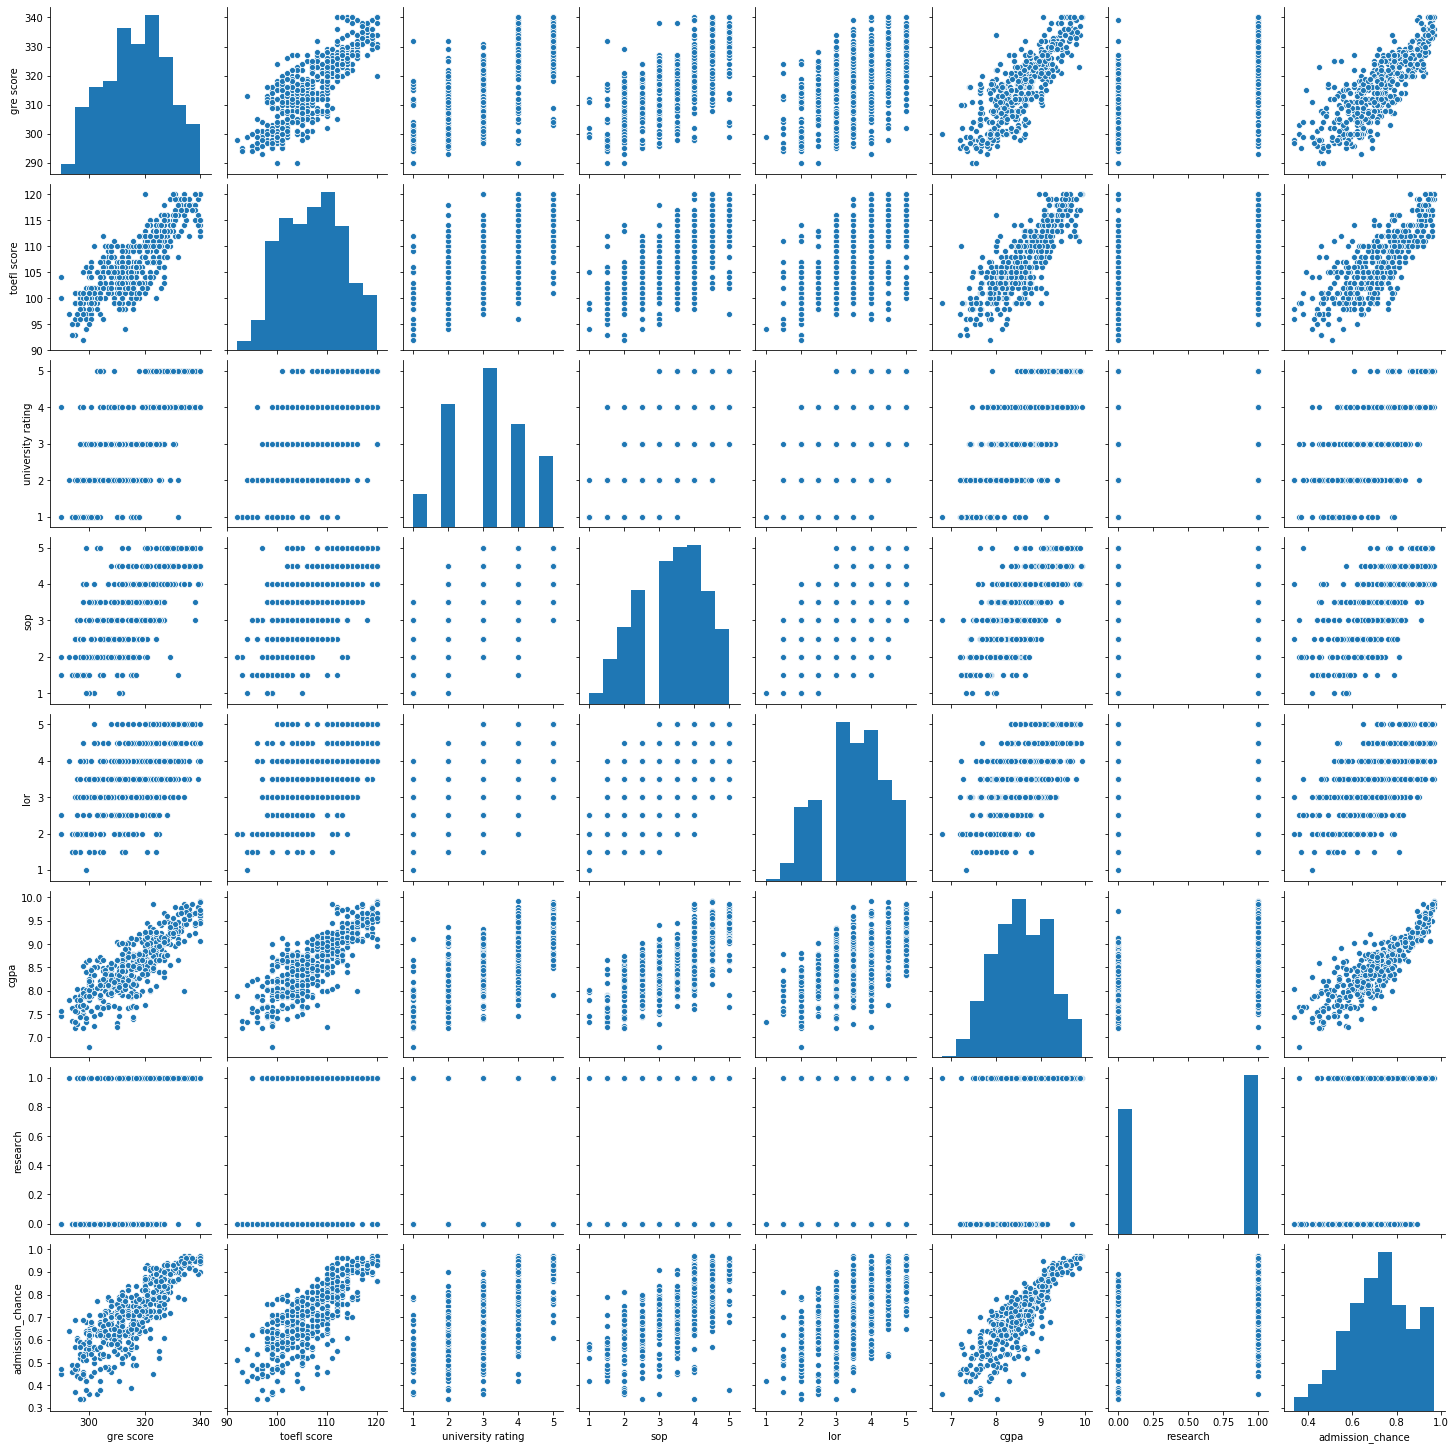

In [9]:
sns.pairplot(df)

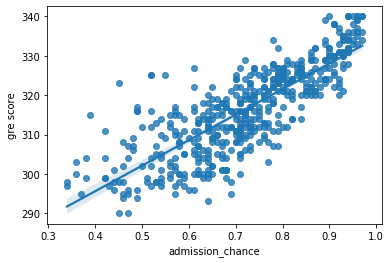

In [10]:
sns.regplot(x='admission_chance', y="gre score", data=df)

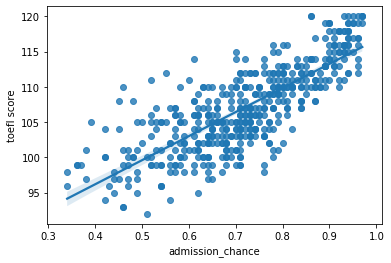

In [11]:
sns.regplot(x='admission_chance', y="toefl score", data=df)

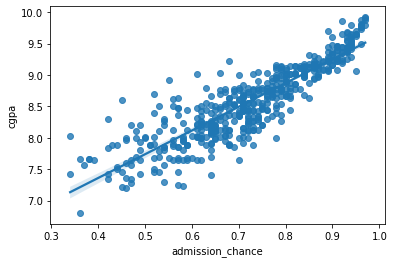

In [12]:
sns.regplot(x='admission_chance', y="cgpa", data=df)

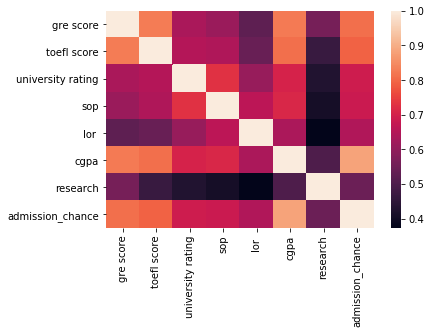

In [13]:
corrmat=  df.corr()

sns.heatmap(data=corrmat)

It looks that the Toefl score, GRE score and CGPA is highly corellated with the admission chance

There is no missing values, now lets visualise the outliers, if any, and scale the features down if required

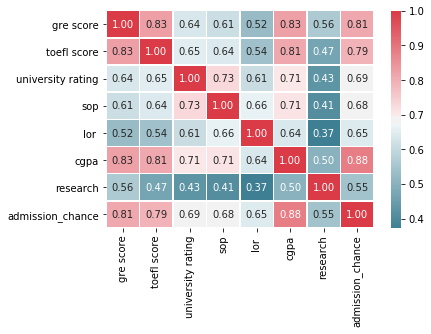

In [14]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat, cmap=colormap, linewidths=.5, annot=True, fmt=".2f")

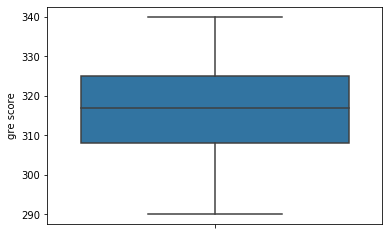

In [15]:
sns.boxplot(y='gre score', data=df)

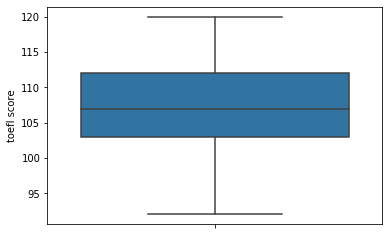

In [16]:
sns.boxplot(y='toefl score', data=df)

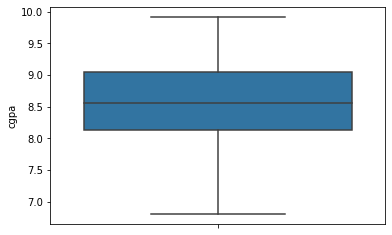

In [17]:
sns.boxplot(y='cgpa', data=df)

In [18]:
df[['toefl score', 'gre score', 'cgpa']].describe()

,toefl score,gre score,cgpa
count,500.000000,500.000000,500.000000
mean,107.192000,316.472000,8.576440
std,6.081868,11.295148,0.604813
min,92.000000,290.000000,6.800000
25%,103.000000,308.000000,8.127500
50%,107.000000,317.000000,8.560000
75%,112.000000,325.000000,9.040000
max,120.000000,340.000000,9.920000


Since there is no much difference between the minimum value and maximum value, we will try to fit the model without scaling and measure the accuracy.

And then fit the model with the accuracy and measure the accuray. Lets choose the best model with respect to accuracy

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop('admission_chance', axis=1)

y = df.admission_chance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
predictions = model.predict(X_test)

In [23]:
predictions

array([0.91511671, 0.80096454, 0.56698169, 0.71554605, 0.81390661,
       0.86369054, 0.47576979, 0.65689721, 0.82273635, 0.7982669 ,
       0.72862179, 0.73622434, 0.64813032, 0.9346675 , 0.82450311,
       0.51186823, 0.83928703, 0.59499829, 0.53474719, 0.55743395,
       0.65139979, 0.55960606, 0.72597532, 0.78719666, 0.77227824,
       0.60083909, 0.94827683, 0.85180401, 0.62812365, 0.74690669,
       0.56707002, 0.73824374, 0.55052175, 0.85982706, 0.64640312,
       0.72924109, 0.55700654, 0.96025868, 0.64037951, 0.71097655,
       0.97131292, 0.57055069, 0.6611793 , 0.85759498, 0.93917418,
       0.59040562, 0.95786522, 0.83467235, 0.79017246, 0.92931474,
       0.8943697 , 0.56849664, 0.72314422, 0.52608936, 0.95139867,
       0.5955869 , 0.95686868, 0.75199576, 0.67435472, 0.49982507,
       0.63081217, 0.66988487, 0.60147486, 0.61108054, 0.43987784,
       0.59423481, 0.86823574, 0.89370314, 0.65740404, 0.70675741,
       0.61182108, 0.77998894, 0.69357187, 0.5610497 , 0.55083

In [24]:
from sklearn.metrics import mean_squared_error as mse
import numpy as np

In [25]:
np.sqrt(mse(y_test, predictions))

0.06280328867508024

the root mean squared error is very less and hence we can proceed with this odel. Lets use Lasso regression, since it uses only those features that are important

In [26]:
from sklearn.linear_model import Lasso

In [27]:
lasso = Lasso()

In [28]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
lasso_predictions = lasso.predict(X_test)

In [30]:
np.sqrt(mse(y_test, lasso_predictions))

0.12623788196124425

Since, the root mean squared error for the Lasso is bit higher than the normal Linear Regression, we will consider the linear regression model itself 

In [33]:
df['university rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: university rating, dtype: int64

In [34]:
df.sop.value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: sop, dtype: int64

In [36]:
df.research.value_counts()

1    280
0    220
Name: research, dtype: int64

In [38]:
df['university rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: university rating, dtype: int64